<div align="center"><h1>
FYS-STK4155 - Exercises Week 43
</div>
<hr style="border:2px solid gray"> </hr>
<div align="center"><h3>
Håvard Skåli
</div>

In [524]:
import autograd.numpy as np  # We need to use this numpy wrapper to make automatic differentiation work later
from autograd import grad, elementwise_grad
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.rcParams.update({'text.usetex': True, 'font.size': 16, 'font.family': 'serif', 'font.serif': 'Computer Modern Sans Serif', 'font.weight': 100, 'mathtext.fontset': 'cm', 'xtick.labelsize': 14, 'ytick.labelsize': 14})

# seed = 2024
# np.random.seed(seed)

# Defining some activation functions
def ReLU(z):
    return np.where(z > 0, z, 0)


# Derivative of the ReLU function
def ReLU_der(z):
    return np.where(z > 0, 1, 0)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(z):
    """Compute softmax values for each set of scores in the rows of the matrix z.
    Used with batched input data."""
    e_z = np.exp(z - np.max(z, axis=0))
    return e_z / np.sum(e_z, axis=1)[:, np.newaxis]


def softmax_vec(z):
    """Compute softmax values for each set of scores in the vector z.
    Use this function when you use the activation function on one vector at a time"""
    e_z = np.exp(z - np.max(z))
    return e_z / np.sum(e_z)

def mse(predict, target):
    return np.mean((predict - target) ** 2)

## Exercise 1: Last week's exercises

### Exercise 1:

In [525]:
x = np.random.randn(2)      # Network input. This is a single input with two features
W1 = np.random.randn(4, 2)  # First layer weights

#### a)

The input shape is determined by the shape of `x`, hence the input shape of the neural network is `(2,)`. The output shape of the first layer is determined by the matrix multiplication between the weight matrix `W1` and the input `x`. Since `W1` has a shape of `(4, 2)` and `x` has a shape of `(2,)`, the resulting output will have a shape of `(4,)`, meaning the first layer will output a vector with 4 elements.

#### b)

To define the bias vector `b1` for the first layer, the shape of `b1` must match the output shape of the first layer. From the previous part, we know that the output shape of the first layer is `(4,)`. Therefore, `b1` should be a vector of shape `(4,)`.

To set it up, you would typically use random values or initialize it to zeros, depending on the context. Since the instruction suggests aligning random values with a specific test, we can define `b1` like this:

In [526]:
b1 = np.random.randn(4)  # Random bias values for the first layer

#### c)

In [527]:
z1 = W1 @ x + b1  # Intermediate inputs to the activation function for first hidden layer

#### d)

In [528]:
a1 = ReLU(z1)   # Outputs of activation function for first hidden layer

In [529]:
sol1 = np.array([0.60610368, 4.0076268, 0.0, 0.56469864])

print(np.allclose(a1, sol1))

False


### Exercise 2:

#### a)

The input to the second layer will be the output of the first layer after applying any necessary activation functions. Since the first layer had an output shape of `(4,)`, this means the second layer will receive an input with this shape.

#### b)

Since the second layer has an output size of 8, and the input to the second layer has a size of 4 (from the previous layer), the weight matrix `W2` will have a shape of `(8, 4)`, and the bias vector `b2` will have a shape of `(8,)`.

In [530]:
W2 = np.random.randn(8, 4)  # Weight matrix for the second layer
b2 = np.random.randn(8)     # Bias for the second layer

#### c)

In [531]:
z2 = W2 @ a1 + b2 
a2 = ReLU(z2)    

In [532]:
print(
    np.allclose(np.exp(len(a2)), 2980.9579870417283)
)  # This should evaluate to True if a2 has the correct shape :)

True


### Exercise 3:

#### a)

In [533]:
def create_layers(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(layer_output_size, i_size)
        b = np.random.randn(layer_output_size)
        layers.append((W, b))

        i_size = layer_output_size
    return layers

#### b)

In [534]:
def feed_forward_all_relu(layers, input):
    a = [input]
    for W, b in layers:
        z = W @ a[-1] + b
        a.append(ReLU(z))
    return a[1:]

#### c)

In [535]:
input_size = 8
layer_output_sizes = [10, 16, 6, 2]

x = np.random.rand(input_size)
layers = create_layers(input_size, layer_output_sizes)
predicts = feed_forward_all_relu(layers, np.random.randn(input_size))
# for predict in predicts:
#     print(predict.size, predict)

print(np.allclose([len(predict) for predict in predicts], layer_output_sizes))

True


#### d)

A neural network without activation functions between layers is mathematically equivalent to a single-layer network because then the entire network is essentially performing a single linear transformation. To explain this, consider that each layer in a neural network applies a linear transformation to its input: $\mathbf{z} = \mathbf{W}\mathbf{x} + \mathbf{b}$, where $\mathbf{W}$ is the weight matrix, $\mathbf{x}$ is the input, and $\mathbf{b}$ is the bias. If there is no non-linearity, i.e. no activation function), every subsequent layer just applies another linear transformation. Now, since the composition of multiple linear transformations is still a linear transformation, we can combine the linear transformations from two layers, $\mathbf{z}_1 = \mathbf{W}_1 \mathbf{x} + \mathbf{b}_1$ and $\mathbf{z}_2 = \mathbf{W}_2 \mathbf{z}_1 + \mathbf{b}_2$, into a single linear operation:
$$
\mathbf{z}_2 = \mathbf{W}_2 (\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1) + \mathbf{b}_2 = (\mathbf{W}_2  \mathbf{W}_1)  \mathbf{x} + (\mathbf{W}_2  \mathbf{b}_1 + \mathbf{b}_2)
$$

Activation functions like ReLU, sigmoid, or tanh introduce non-linearity, which is essential for the network to model complex patterns. Without these, the network is simply a chain of linear operations, which can be collapsed into one. Thus, without activation functions, a multi-layer neural network can be reduced to a single-layer network because it doesn’t gain any representational power from having multiple layers of linear transformations.

### Exercise 4:

#### a)

In [536]:
def feed_forward(input, layers, activation_funcs):
    a = [input]
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = W @ a[-1] + b
        a.append(activation_func(z))
    return a[1:]

#### b)

In [537]:
network_input_size = 6
layer_output_sizes = [10, 8, 12]
activation_funcs_1 = [ReLU, ReLU, sigmoid]
layers = create_layers(network_input_size, layer_output_sizes)

x = np.random.randn(network_input_size)
outputs_1 = feed_forward(x, layers, activation_funcs_1)

#### c)

In [538]:
activation_funcs_2 = [sigmoid, sigmoid, ReLU]
outputs_2 = feed_forward(x, layers, activation_funcs_2)

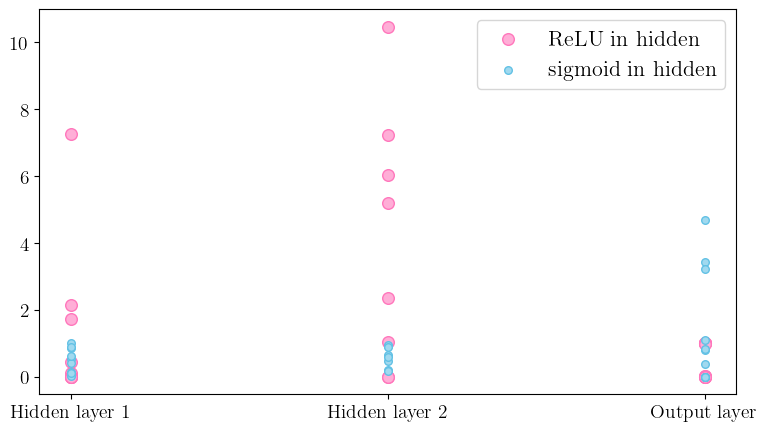

In [539]:
plt.figure(figsize = (9, 5))
for i in range(3):
    plt.scatter([i+1]*len(outputs_1[i]), outputs_1[i], s = 70, c = "#ffaed7", edgecolor = "#ff77bc", label = "ReLU in hidden" if i == 0 else None)
    plt.scatter([i+1]*len(outputs_2[i]), outputs_2[i], s = 30, c = "#a0d9ef", edgecolor = "#62c1e5", label = "sigmoid in hidden" if i == 0 else None)
plt.legend()
plt.xticks([1, 2, 3], labels = ["Hidden layer 1", "Hidden layer 2", "Output layer"])
plt.show()

We see that having the sigmoid activation function in the hidden layers results in smaller outputs, which makes sense since the sigmoid activation function is a non-linear function that effectively "squashes" its inputs to give output values between 0 and 1. This makes the model behave in a "soft" thresholding manner, where values are not highly activated unless the input is sufficiently large. The ReLU function outputs the input directly if it is positive, and 0 otherwise. This is why having ReLU in the hidden layers leads to large outputs until we reach the output layer where they are constrained to be 1 at most, while we get outputs larger than 1 when we use ReLU in the output layer and sigmoid in the hidden layers even though the hidden layer outputs lie between 0 and 1.

### Exercise 5:

#### a)

In [540]:
def create_layers_batch(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(i_size, layer_output_size)
        b = np.random.randn(layer_output_size)
        layers.append((W, b))

        i_size = layer_output_size
    return layers

#### b)

In [541]:
def feed_forward_batch(inputs, layers, activation_funcs):
    a = inputs
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = a @ W + b
        a = activation_func(z)
    return a

#### c)

In [542]:
network_input_size = 4
layer_output_sizes = [12, 10, 3]
activation_funcs = [ReLU, ReLU, softmax]
layers = create_layers_batch(network_input_size, layer_output_sizes)

inputs = np.random.randn(1000, network_input_size)
outputs = feed_forward_batch(inputs, layers, activation_funcs)
print(np.allclose([len(output) for output in outputs], 1000*[layer_output_sizes[-1]]))

True


### Exercise 6:

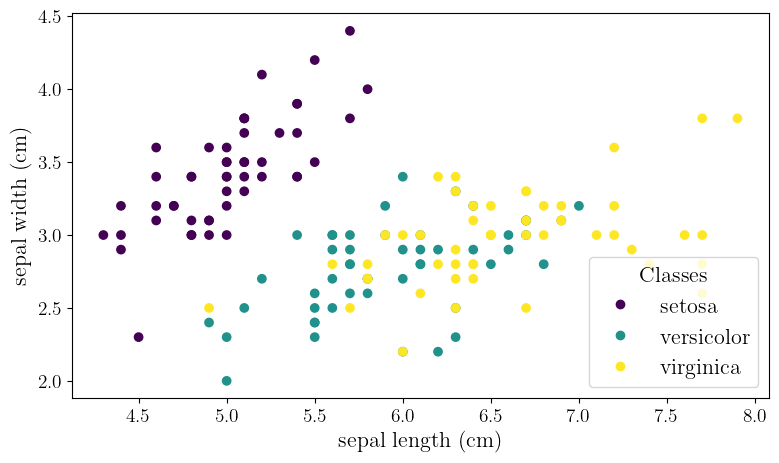

In [543]:
iris = datasets.load_iris()

_, ax = plt.subplots(figsize = (9, 5))
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [544]:
inputs = iris.data

# Since each prediction is a vector with a score for each of the three types of flowers,
# we need to make each target a vector with a 1 for the correct flower and a 0 for the others.
targets = np.zeros((len(iris.data), 3))
for i, t in enumerate(iris.target):
    targets[i, t] = 1

def accuracy(predictions, targets):
    one_hot_predictions = np.zeros(predictions.shape)

    for i, prediction in enumerate(predictions):
        one_hot_predictions[i, np.argmax(prediction)] = 1
    return accuracy_score(one_hot_predictions, targets)

#### a)

The input to the neural network is based on the features of the Iris dataset. Each flower is represented by 4 features: sepal length, sepal width, petal length and petal width. Thus, the input size for the network must be 4, as each data point has 4 features. The task is a classification problem with 3 classes, corresponding to the 3 species of flowers (Setosa, Versicolor and Virginica). The output layer of the network needs to produce a score for each class, and the output size of the last layer should therefore be 3, corresponding to the 3 possible flower species. 

#### b)

In [545]:
layers = create_layers_batch(4, [8, 3])

#### c)

In [546]:
predictions = feed_forward_batch(inputs, layers, [sigmoid, softmax])

#### d)

In [547]:
# Compute the accuracy using the one-hot encoded targets
print(accuracy(predictions, targets))

0.66


In [548]:
for i in range(5):
    layers = create_layers_batch(4, [8, 3])
    predictions = feed_forward_batch(inputs, layers, [sigmoid, softmax])
    print(accuracy(predictions, targets))

0.32666666666666666
0.0
0.5466666666666666
0.6133333333333333
0.16666666666666666


### Exercise 7:

In [549]:
def cross_entropy(predict, target):
    return np.sum(-target * np.log(predict))


def cost(input, layers, activation_funcs, target):
    predict = feed_forward_batch(input, layers, activation_funcs)
    return cross_entropy(predict, target)

In [550]:
from autograd import grad


gradient_func = grad(
    cost, 1
)  # Taking the gradient wrt. the second input to the cost function, i.e. the layers

#### a)

The gradient of the cost function with respect to the weights and biases depends on the shapes of the corresponding weight matrices and bias vectors in each layer of the neural network. More specifically, for each layer, the gradient of the cost function with respect to the weights $(\partial C/\partial \mathbf{W})$ will have the same shape as the weight matrix for that layer. Similarly, the gradient of the cost function with respect to the biases $(\partial C/\partial \mathbf{b})$ will have the same shape as the bias vector for that layer.

#### b)

In [551]:
layers_grad = gradient_func(
    inputs, layers, activation_funcs, targets
) 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: divide by zero encountered in log
  return f_raw(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in multiply
  return f_raw(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:77: RuntimeWarning: divide by zero encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:77: RuntimeWarning: invalid value encountered in divide
  defvjp(anp.log,    lambda ans, x : lambda g: g / x)


In [552]:
print(len(layers_grad))
print(len(layers_grad[0]), len(layers_grad[1]))
print(layers_grad[0][0].shape, layers_grad[0][1].shape, layers_grad[1][0].shape, layers_grad[1][1].shape)

2
2 2
(4, 8) (8,) (8, 3) (3,)


The `grad` function from autograd computes the gradient of a given function with respect to its inputs. In this context, it computes the gradient of the cost function with respect to the weights and biases of the neural network. The object `layers_grad` should contain the gradients of the cost function with respect to the weights and biases for each layer in the network. These gradients should therefore have the same shape as the corresponding weights and biases for each layer, which we see is the case.

#### c)

In [553]:
def train_network(inputs, layers, activation_funcs, targets, learning_rate = 0.001, epochs = 100):
    for i in range(epochs):
        layers_grad = gradient_func(inputs, layers, activation_funcs, targets)
        for (W, b), (W_g, b_g) in zip(layers, layers_grad):
            W -= learning_rate * W_g  
            b -= learning_rate * b_g  

The gradient method used in this training process is called Gradient Descent (specifically, Batch Gradient Descent) because we are computing the gradients of the cost function with respect to all weights and biases using the entire batch of inputs at once, and then updating the parameters using these gradients.

#### d)

In [554]:
accuracies = np.zeros((2, 100))
for i in range(100):
    layers = create_layers_batch(4, [8, 3])
    predictions_before = feed_forward_batch(inputs, layers, [sigmoid, softmax])

    train_network(inputs, layers, [sigmoid, softmax], targets)
    predictions_after = feed_forward_batch(inputs, layers, [sigmoid, softmax])

    accuracies[0, i] = accuracy(predictions_before, targets)
    accuracies[1, i] = accuracy(predictions_after, targets)

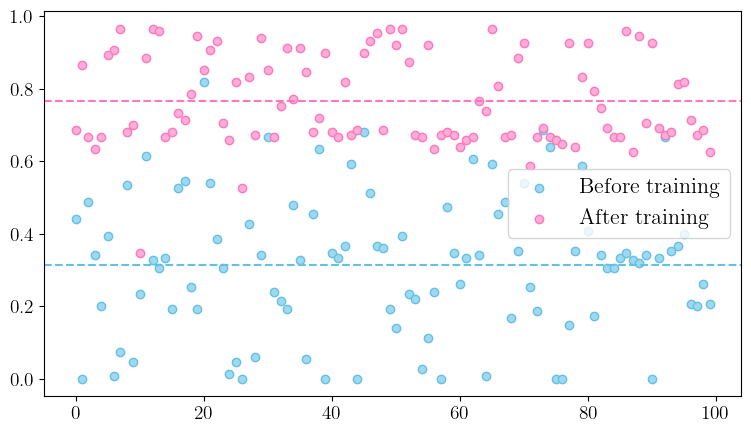

In [555]:
plt.figure(figsize = (9, 5))
plt.scatter([i for i in range(100)], accuracies[0], c = "#a0d9ef", edgecolor = "#62c1e5", label = "Before training")
plt.scatter([i for i in range(100)], accuracies[1], c = "#ffaed7", edgecolor = "#ff77bc", label = "After training")
plt.axhline(np.mean(accuracies[0]), 0, 1, linestyle = "--", color = "#62c1e5")
plt.axhline(np.mean(accuracies[1]), 0, 1, linestyle = "--", color = "#ff77bc")
plt.legend()
plt.show()

#### e)

The Iris dataset is relatively simple and well-separated. It's common for a well-configured neural network to achieve very high accuracy, often close to 100%, when using the entire dataset for training. We see in the figure above that quite a few of the accuracies are above 90%, although the mean lies below 80%.

## Exercise 2: Gradient with one layer using autograd

### a)

From last week we know that the gradient of the cost function with respect to the weights and biases depends on the shapes of the corresponding weight matrices and bias vectors in each layer of the neural network. More specifically, for each layer, the gradient of the cost function with respect to the weights $(\partial C/\partial \mathbf{W})$ will have the same shape as the weight matrix for that layer. Similarly, the gradient of the cost function with respect to the biases $(\partial C/\partial \mathbf{b})$ will have the same shape as the bias vector for that layer. In this specific case, $(\partial C/\partial \mathbf{W})$ and $(\partial C/\partial \mathbf{b})$ have shapes `(10,4)` and `(10)`, respectively.

### b)

In [556]:
def feed_forward_one_layer(W, b, x):
    z = W @ x + b  
    a = sigmoid(z) 
    return a


def cost_one_layer(W, b, x, target):
    predict = feed_forward_one_layer(W, b, x)
    return mse(predict, target)


x = np.random.rand(2)
target = np.random.rand(3)

# Initialize W and b with random values
W = np.random.rand(3, 2)  
b = np.random.rand(3)  

# Test the feedforward pass
output = feed_forward_one_layer(W, b, x)
print("Output of the feedforward pass:", output)

# Compute the cost
cost_value = cost_one_layer(W, b, x, target)
print("Cost value:", cost_value)

Output of the feedforward pass: [0.81694443 0.85213222 0.84262374]
Cost value: 0.3154400099594381


### c)

In [557]:
autograd_one_layer = grad(cost_one_layer, [0, 1])
W_g, b_g = autograd_one_layer(W, b, x, target)
print(W_g, b_g)

[[0.03662021 0.02163415]
 [0.04087283 0.02414647]
 [0.02856117 0.0168731 ]] [0.05163175 0.05762764 0.04026912]


## Exercise 3: Gradient with one layer writing backpropagation by hand

### a)

With the chain rule we have
$$
\begin{aligned}
\frac{\text{d}C}{\text{d}W} &= \frac{\text{d}C}{\text{d}a} \frac{\text{d}a}{\text{d}z} \frac{\text{d}z}{\text{d}W},
\\
\frac{\text{d}C}{\text{d}b} &= \frac{\text{d}C}{\text{d}a} \frac{\text{d}a}{\text{d}z} \frac{\text{d}z}{\text{d}b}.
\end{aligned}
$$
In both expressions we the derivative of the cost function with respect to the final activation `a` ($\text{d}C/\text{d}a$), as well as the derivative of the activation with respect to the pre-activation value `z` ($\text{d}a/\text{d}z$). These intermediary results can thus be reused between the two expressions.

### b)

To calculate the derivative of the cost with respect to the final activation, we first consider that the cost is defined through the MSE as 
$$
C = \frac{1}{N} \sum\left(a-y\right)^2 = \frac{1}{N}\left( a - y \right)^\top\left( a - y \right),
$$
where $a$ is the final activation (vector), $y$ is the target vector and $N$ is the number of samples. The derivative with respect to $a$ is thus
$$
\frac{\text{d}C}{\text{d}a} = \frac{2}{N} (a - y)
$$

In [558]:
z = W @ x + b
a = sigmoid(z)

predict = a

def mse_der(predict, target):
    return 2/len(target) * (predict - target)

print(mse_der(predict, target))

cost_autograd = grad(mse, 0)
print(cost_autograd(predict, target))

print(np.allclose(mse_der(predict, target), cost_autograd(predict, target)))

[0.34525614 0.45735167 0.30366811]
[0.34525614 0.45735167 0.30366811]
True


### c)

The sigmoid activation function is given by 
$$
\sigma(z) = \frac{1}{1+e^{-z}},
$$
hence its derivative:
$$
\frac{\text{d}\sigma}{\text{d}z} = -\frac{1}{\left(1+e^{-z}\right)^2}\left(-e^{-z}\right) = \frac{e^{-z}}{\left(1+e^{-z}\right)^2}.
$$

In [559]:
def sigmoid_der(z):
    return np.exp(-z) / (1 + np.exp(-z))**2

print(sigmoid_der(z))

sigmoid_autograd = elementwise_grad(sigmoid, 0)
print(sigmoid_autograd(z))

print(np.allclose(sigmoid_der(z), sigmoid_autograd(z)))

[0.14954623 0.1260029  0.13260897]
[0.14954623 0.1260029  0.13260897]
True


### d)

The intermediary gradient when $a=\sigma(z)$ is
$$
\frac{\text{d}C}{\text{d}z} = \frac{\text{d}C}{\text{d}a}\frac{\text{d}a}{\text{d}z} = \frac{2}{N} \left(\frac{1}{1+e^{-z}} - y\right)\frac{e^{-z}}{\left(1+e^{-z}\right)^2}.
$$

In [560]:
dC_da = mse_der(predict, target)
da_dz = sigmoid_der(z) 
dC_dz = dC_da*da_dz
print(dC_dz)

def intermediary_grad(z, target):
    N = len(target)
    return (2/N) * (1/(1 + np.exp(-z)) - target) * np.exp(-z)/(1 + np.exp(-z))**2

print(intermediary_grad(z, target))

[0.05163175 0.05762764 0.04026912]
[0.05163175 0.05762764 0.04026912]


### e)

The derivatives of $z=Wx+b$ with respect to the weigth $W$ and bias $b$ are
$$
\begin{aligned}
\frac{\text{d}z}{\text{d}W} &= x,
\\
\frac{\text{d}z}{\text{d}b} &= 1.
\end{aligned}
$$
The shapes of $\text{d}z/\text{d}W$ and $\text{d}z/\text{d}b$ should be the same as the shapes of $W$ and $b$, respectively. Thus, the rows of the matrix $\text{d}z/\text{d}W$ must all be equal to the (transposed) input vector $x$, while $\text{d}z/\text{d}b$ must be a column vector of only ones with equal length as the bias $b$.

In [561]:
print(z.shape)
print(x.shape)
print(W.shape)
print(b.shape)

grad_W = elementwise_grad(lambda x, W, b: W @ x + b, 1)
grad_b = elementwise_grad(lambda x, W, b: W @ x + b, 2)

print(grad_W(x, W, b).shape)
print(grad_b(x, W, b).shape)

print(np.allclose(np.array([x, x, x]), grad_W(x, W, b)))
print(np.allclose(np.ones(len(b)), grad_b(x, W, b)))

(3,)
(2,)
(3, 2)
(3,)
(3, 2)
(3,)
True
True


### f)

In [562]:
dC_da = mse_der(predict, target)
dC_dz = dC_da * sigmoid_der(z)
dC_dW = dC_dz[..., None] * grad_W(x, W, b)
dC_db = dC_dz * grad_b(x, W, b)
print(dC_dW, dC_db)

W_g, b_g = autograd_one_layer(W, b, x, target)
print(W_g, b_g)

print(np.allclose(dC_dW, W_g), np.allclose(dC_db, b_g))

[[0.03662021 0.02163415]
 [0.04087283 0.02414647]
 [0.02856117 0.0168731 ]] [0.05163175 0.05762764 0.04026912]
[[0.03662021 0.02163415]
 [0.04087283 0.02414647]
 [0.02856117 0.0168731 ]] [0.05163175 0.05762764 0.04026912]
True True


## Exercise 4: Gradient with two layers writing backpropagation by hand

In [563]:
x = np.random.rand(2)
target = np.random.rand(4)

W1 = np.random.rand(3, 2)
b1 = np.random.rand(3)

W2 = np.random.rand(4, 3)
b2 = np.random.rand(4)

layers = [(W1, b1), (W2, b2)]

In [564]:
z1 = W1 @ x + b1
a1 = sigmoid(z1)
z2 = W2 @ a1 + b2
a2 = sigmoid(z2)

### a)

In [565]:
dC_da2 = mse_der(a2, target)
dC_dz2 = dC_da2 * sigmoid_der(z2)
dC_dW2 = dC_dz2[..., None] * grad_W(a1, W2, b2)
dC_db2 = dC_dz2 * grad_b(a1, W2, b2)

### b)

The second layer intermediate is given by 
$$
z_2 = W_2a_1 + b_2,
$$
hence the derivative
$$
\frac{\text{d}z_2}{\text{d}a_1} = W_2
$$

### c)

In [566]:
dC_da1 = dC_dz2 @ W2
dC_dz1 = dC_da1 * sigmoid_der(z1)
dC_dW1 = dC_dz1[..., None] * grad_W(x, W1, b1)
dC_db1 = dC_dz1 * grad_b(x, W1, b1)

In [567]:
print(dC_dW1, dC_db1)
print(dC_dW2, dC_db2)

[[0.00214988 0.01049526]
 [0.00089597 0.00437393]
 [0.00207304 0.01012016]] [0.01959684 0.00816703 0.01889644]
[[0.01069712 0.00980507 0.01111649]
 [0.03957293 0.03627288 0.04112436]
 [0.00989957 0.00907402 0.01028767]
 [0.01695396 0.01554014 0.01761863]] [0.01813202 0.06707761 0.01678013 0.02873761]


### d)

In [568]:
def feed_forward_two_layers(layers, x):
    W1, b1 = layers[0]
    z1 = W1 @ x + b1
    a1 = sigmoid(z1)

    W2, b2 = layers[1]
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)

    return a2

In [569]:
def cost_two_layers(layers, x, target):
    predict = feed_forward_two_layers(layers, x)
    return mse(predict, target)

grad_two_layers = grad(cost_two_layers, 0)
grad1, grad2 = grad_two_layers(layers, x, target)
print(np.allclose(grad1[0], dC_dW1), np.allclose(grad1[1], dC_db1), np.allclose(grad2[0], dC_dW2), np.allclose(grad2[1], dC_db2))

True True True True


### e)

If we have $n$ layers (including the input and output layers), the expressions for the gradients at layer $i$, where $i-1\neq1$ and $i+1\neq n$, are
$$
\begin{aligned}
\frac{\text{d}C}{\text{d}a_i} &= \frac{\text{d}C}{\text{d}z_{i+1}}\frac{\text{d}z_{i+1}}{\text{d}a_i} = \frac{\text{d}C}{\text{d}z_{i+1}}W_{i+1},
\\
\frac{\text{d}C}{\text{d}z_i} &= \frac{\text{d}C}{\text{d}a_i}\frac{\text{d}a_{i}}{\text{d}z_i} = \frac{\text{d}C}{\text{d}z_{i+1}}W_{i+1}\frac{\text{d}a_{i}}{\text{d}z_i},
\\
\frac{\text{d}C}{\text{d}W_i} &= \frac{\text{d}C}{\text{d}z_i}\frac{\text{d}z_{i}}{\text{d}W_i} = \frac{\text{d}C}{\text{d}z_{i+1}}W_{i+1}\frac{\text{d}a_{i}}{\text{d}z_i}a_{i-1},
\\
\frac{\text{d}C}{\text{d}b_i} &= \frac{\text{d}C}{\text{d}z_i}\frac{\text{d}z_{i}}{\text{d}b_i} = \frac{\text{d}C}{\text{d}z_i}.
\end{aligned}
$$

## Exercise 5: Gradient with any number of layers writing backpropagation by hand

In [691]:
def create_layers(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(layer_output_size, i_size)
        b = np.random.randn(layer_output_size)
        layers.append((W, b))

        i_size = layer_output_size
    return layers


def feed_forward(input, layers, activation_funcs):
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = W @ a + b
        a = activation_func(z)
    return a


def cost(layers, input, activation_funcs, target):
    predict = feed_forward(input, layers, activation_funcs)
    return mse(predict, target)

In [692]:
def feed_forward_saver(input, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        layer_inputs.append(a)
        z = W @ a + b
        a = activation_func(z)

        zs.append(z)

    return layer_inputs, zs, a

In [693]:
def backpropagation(
    input, layers, activation_funcs, target, activation_ders, cost_der = mse_der
):
    layer_inputs, zs, predict = feed_forward_saver(input, layers, activation_funcs)

    layer_grads = [() for layer in layers]

    # We loop over the layers, from the last to the first
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]

        if i == len(layers) - 1:
            # For last layer we use cost derivative as dC_da(L) can be computed directly
            dC_da = cost_der(predict, target)
        else:
            # For other layers we build on previous z derivative, as dC_da(i) = dC_dz(i+1) * dz(i+1)_da(i)
            (W, b) = layers[i + 1]
            dC_da = dC_dz @ W

        dC_dz = dC_da * activation_der(z)
        dC_dW = dC_dz[..., None] * layer_input
        dC_db = dC_dz

        layer_grads[i] = (dC_dW, dC_db)

    return layer_grads

In [694]:
network_input_size = 2
layer_output_sizes = [3, 4]
activation_funcs = [sigmoid, ReLU]
activation_ders = [sigmoid_der, ReLU_der]

layers = create_layers(network_input_size, layer_output_sizes)

x = np.random.rand(network_input_size)
target = np.random.rand(4)

In [695]:
layer_grads = backpropagation(x, layers, activation_funcs, target, activation_ders)
print(layer_grads)

[(array([[-0.01196789, -0.03777651],
       [-0.02445443, -0.07719015],
       [ 0.00431774,  0.01362889]]), array([-0.04659636, -0.09521209,  0.01681089])), (array([[-0.        , -0.        , -0.        ],
       [ 0.68285324,  0.78326549,  0.49253331],
       [-0.        , -0.        , -0.        ],
       [ 0.41395977,  0.47483176,  0.29858389]]), array([-0.        ,  0.9495006 , -0.        ,  0.57560692]))]


In [696]:
cost_grad = grad(cost, 0)
layer_grads_auto = cost_grad(layers, x, [sigmoid, ReLU], target)
print(layer_grads_auto)

[(array([[-0.01196789, -0.03777651],
       [-0.02445443, -0.07719015],
       [ 0.00431774,  0.01362889]]), array([-0.04659636, -0.09521209,  0.01681089])), (array([[0.        , 0.        , 0.        ],
       [0.68285324, 0.78326549, 0.49253331],
       [0.        , 0.        , 0.        ],
       [0.41395977, 0.47483176, 0.29858389]]), array([0.        , 0.9495006 , 0.        , 0.57560692]))]


In [697]:
print(np.allclose(layer_grads[0][0], layer_grads_auto[0][0]), np.allclose(layer_grads[0][1], layer_grads_auto[0][1]), np.allclose(layer_grads[1][0], layer_grads_auto[1][0]), np.allclose(layer_grads[1][1], layer_grads_auto[1][1]))

True True True True


## Exercise 6: Batched inputs

In [826]:
def create_layers_batch(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(i_size, layer_output_size)
        b = np.random.randn(layer_output_size) 
        layers.append((W, b))

        i_size = layer_output_size
    return layers

def feed_forward_batch(inputs, layers, activation_funcs):
    a = inputs
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = a @ W + b
        a = activation_func(z)
    return a

def cost_batch(inputs, layers, activation_funcs, target):
    predicts = feed_forward_batch(inputs, layers, activation_funcs)
    return mse(predicts, target)

In [827]:
def feed_forward_saver_batch(inputs, layers, activation_funcs):
    layers_inputs = []
    zs = []
    a = inputs
    for (W, b), activation_func in zip(layers, activation_funcs):
        layers_inputs.append(a)
        z = a @ W + b
        a = activation_func(z)

        zs.append(z)

    return layers_inputs, zs, a

In [842]:
def backpropagation_batch(
    inputs, layers, activation_funcs, targets, activation_ders, cost_der = mse_der
):
    #TODO something wrong with this function?
    layers_inputs, zs, predicts = feed_forward_saver_batch(inputs, layers, activation_funcs)

    layers_grads = [() for layer in layers]

    # We loop over the layers, from the last to the first
    for i in reversed(range(len(layers))):
        layer_inputs, z, activation_der = layers_inputs[i], zs[i], activation_ders[i]

        if i == len(layers) - 1:
            # For last layer we use cost derivative as dC_da(L) can be computed directly
            dC_da = cost_der(predicts, targets)
            # print("dC_da ", dC_da.shape, dC_da)
        else:
            # For other layers we build on previous z derivative, as dC_da(i) = dC_dz(i+1) * dz(i+1)_da(i)
            (W, b) = layers[i + 1]
            dC_da = dC_dz @ W.T

        dC_dz = dC_da * activation_der(z)
        dC_dW = dC_dz.T @ layer_inputs
        dC_db = np.sum(dC_dz, axis = 0)

        layers_grads[i] = (dC_dW.T, dC_db.T)

    return layers_grads

## Exercise 7: Training

### a)

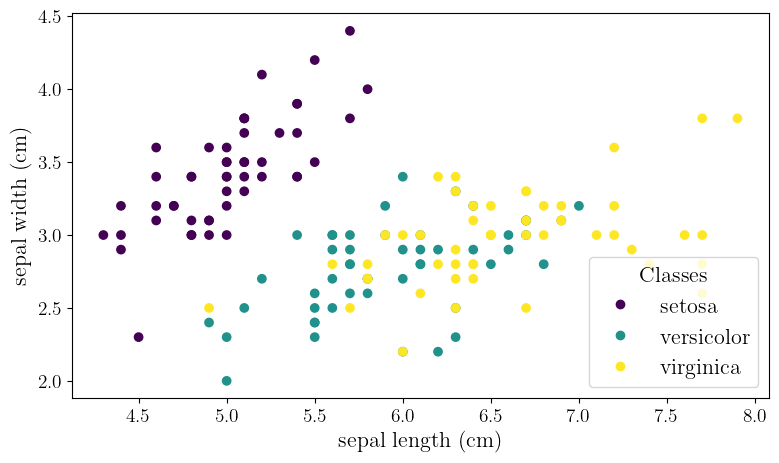

In [829]:
iris = datasets.load_iris()

_, ax = plt.subplots(figsize = (9, 5))
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [830]:
inputs = iris.data

# Since each prediction is a vector with a score for each of the three types of flowers,
# we need to make each target a vector with a 1 for the correct flower and a 0 for the others.
targets = np.zeros((len(iris.data), 3))
for i, t in enumerate(iris.target):
    targets[i, t] = 1

def accuracy(predicts, targets):
    one_hot_predicts = np.zeros(predicts.shape)

    for i, predict in enumerate(predicts):
        one_hot_predicts[i, np.argmax(predict)] = 1
    return accuracy_score(one_hot_predicts, targets)

In [831]:
layers = create_layers_batch(4, [8, 3])
predicts = feed_forward_batch(inputs, layers, [sigmoid, softmax])

In [832]:
# Compute the accuracy using the one-hot encoded targets
print(accuracy(predicts, targets))

0.14666666666666667


In [833]:
for i in range(5):
    layers = create_layers_batch(4, [8, 3])
    predicts = feed_forward_batch(inputs, layers, [sigmoid, softmax])
    print(accuracy(predicts, targets))

0.37333333333333335
0.0
0.38666666666666666
0.32666666666666666
0.20666666666666667


In [834]:
def cross_entropy(predicts, targets):
    return np.sum(-targets * np.log(predicts))

def cost_cross(inputs, layers, activation_funcs, targets):
    predicts = feed_forward_batch(inputs, layers, activation_funcs)
    return cross_entropy(predicts, targets)

cross_der = elementwise_grad(cross_entropy, 0)
cross_cost_grad = grad(cost_cross, 1)

In [835]:
layers_grads_auto = cross_cost_grad(inputs, layers, [sigmoid, softmax], targets)
print(layers_grads_auto)

[(array([[ 4.46329551e-01, -9.86445151e+00, -3.37637120e-02,
         3.25457019e-01,  8.35440192e-01,  3.11763641e-01,
         4.86574443e-06, -1.01106322e+01],
       [ 3.67599657e-01, -2.35540084e+00,  2.06234318e-02,
         2.06698670e-01,  4.97205895e-01,  2.64073262e-01,
         2.39717589e-06, -7.49541608e+00],
       [-5.14927732e-01, -9.76943185e+00, -2.56799300e-01,
         1.35095842e-01,  4.21273445e-01, -5.60492552e-03,
         3.52958800e-06, -1.62079103e+00],
       [-7.40988990e-01, -2.80523438e+00, -1.81466720e-01,
         2.29067025e-02,  9.69583683e-02, -5.36820939e-04,
         1.10136015e-06,  1.34601817e-01]]), array([ 2.81143449e-01, -1.47937950e+00,  3.04616152e-02,  7.76093786e-02,
        1.79015975e-01,  2.55683411e-02,  9.74061215e-07, -2.22914355e+00])), (array([[ 2.00846971e+00, -7.21710334e-01, -1.87150498e+00],
       [ 4.51682083e+00, -4.78494909e-01, -5.25504162e+00],
       [-3.84200480e-02, -2.17445639e-02,  1.26151017e-02],
       [ 2.2119922

In [843]:
softmax_der = elementwise_grad(softmax, 0)
activation_ders = [sigmoid_der, softmax_der]

layers_grads = backpropagation_batch(
    inputs, layers, activation_funcs, targets, activation_ders
) 
print(layers_grads)

[(array([[-5.04211389e-20,  9.22951450e-18,  4.15954148e-18,
        -1.11255240e-22, -5.95272824e-18, -5.27639931e-18,
        -3.10604035e-21,  1.90499974e-23],
       [-2.41056248e-20,  6.23400738e-18,  2.83804006e-18,
        -7.99777079e-23, -3.96410943e-18, -2.53097622e-18,
        -2.18442102e-21, -1.33148229e-23],
       [-4.28371568e-20,  1.72003046e-18,  7.35698625e-19,
         1.96024278e-23, -9.94918516e-19, -3.84285081e-18,
        -6.30683624e-22,  1.14138803e-22],
       [-1.47722265e-20,  2.56176059e-19,  8.38258540e-20,
         2.39478742e-23, -1.40452550e-19, -1.21243863e-18,
        -3.05369184e-23,  5.30702899e-23]]), array([-1.01055055e-20,  1.52929087e-18,  7.04568093e-19, -2.64555876e-23,
       -9.97026926e-19, -9.32024700e-19, -6.24794849e-22,  3.00675426e-24])), (array([[-4.28069808e-18,  5.09350711e-18,  1.23647038e-18],
       [-1.31898118e-18,  4.87334670e-18,  1.26338485e-18],
       [-7.69685079e-19,  1.62992042e-20, -1.79993839e-21],
       [-4.2807361

In [844]:
print(len(layers_grads))
print(len(layers_grads[0]), len(layers_grads[1]))
print(layers_grads[0][0].shape, layers_grads[0][1].shape, layers_grads[1][0].shape, layers_grads[1][1].shape)

2
2 2
(4, 8) (8,) (8, 3) (3,)


In [845]:
def train_network_batch(inputs, layers, activation_funcs, targets, activation_ders, cost_der = mse_der, learning_rate = 0.001, epochs = 100):
    for i in range(epochs):
        layers_grads = backpropagation_batch(inputs, layers, activation_funcs, targets, activation_ders, cost_der = cost_der)
        # gradient_func = grad(
        #     cost_cross, 1
        # )  # Taking the gradient wrt. the second input to the cost function, i.e. the layers
        # layers_grads = gradient_func(inputs, layers, activation_funcs, targets)
        for (W, b), (W_g, b_g) in zip(layers, layers_grads):
            # print(W_g[0], b_g[0])
            W -= learning_rate * W_g  
            b -= learning_rate * b_g  

In [848]:
accuracies = np.zeros((2, 100))
for i in range(100):
    layers = create_layers_batch(4, [8, 3])
    predicts_before = feed_forward_batch(inputs, layers, [sigmoid, softmax])

    train_network_batch(inputs, layers, [sigmoid, softmax], targets, activation_ders)
    predicts_after = feed_forward_batch(inputs, layers, [sigmoid, softmax])

    accuracies[0, i] = accuracy(predicts_before, targets)
    accuracies[1, i] = accuracy(predicts_after, targets)

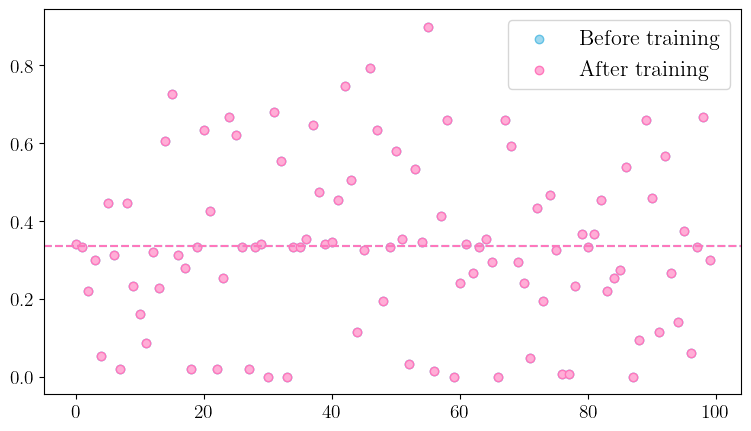

In [850]:
plt.figure(figsize = (9, 5))
plt.scatter([i for i in range(100)], accuracies[0], c = "#a0d9ef", edgecolor = "#62c1e5", label = "Before training")
plt.scatter([i for i in range(100)], accuracies[1], c = "#ffaed7", edgecolor = "#ff77bc", label = "After training")
plt.axhline(np.mean(accuracies[0]), 0, 1, linestyle = "--", color = "#62c1e5")
plt.axhline(np.mean(accuracies[1]), 0, 1, linestyle = "--", color = "#ff77bc")
plt.legend()
plt.show()

In [591]:
#TODO something wrong with gradients, W_g and b_g are very small

### b)

In [856]:
def train_network_sgd_with_momentum(input_data, layers, activation_funcs, target_data, activation_ders, cost_der = mse_der, batch_size = 32, learning_rate = 0.001, momentum = 0.9, epochs = 100):
    # Initialize velocity for each layer to zero
    velocities = [(np.zeros_like(W), np.zeros_like(b)) for W, b in layers]
    
    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(len(input_data))
        input_data, target_data = input_data[indices], target_data[indices]
        
        for start in range(0, len(input_data), batch_size):
            # Get a mini-batch
            end = start + batch_size
            inputs = input_data[start:end]
            targets = target_data[start:end]
            
            # Compute gradients using backpropagation
            layers_grads = backpropagation_batch(inputs, layers, activation_funcs, targets, activation_ders, cost_der = cost_der)
            
            # Update weights and biases with momentum
            for i, (W, b) in enumerate(layers):
                W_g, b_g = layers_grads[i]  # Get gradients for layer i
                
                # Update velocities
                vW, vb = velocities[i]
                vW = momentum * vW - learning_rate * W_g  # Momentum update for weights
                vb = momentum * vb - learning_rate * b_g  # Momentum update for biases
                
                # Update parameters
                layers[i] = (W + vW, b + vb)
                
                # Store updated velocities
                velocities[i] = (vW, vb)

In [857]:
accuracies = np.zeros((2, 100))
for i in range(100):
    layers = create_layers_batch(4, [8, 3])
    predicts_before = feed_forward_batch(inputs, layers, [sigmoid, softmax])

    train_network_sgd_with_momentum(inputs, layers, [sigmoid, softmax], targets, activation_ders)
    predicts_after = feed_forward_batch(inputs, layers, [sigmoid, softmax])

    accuracies[0, i] = accuracy(predicts_before, targets)
    accuracies[1, i] = accuracy(predicts_after, targets)

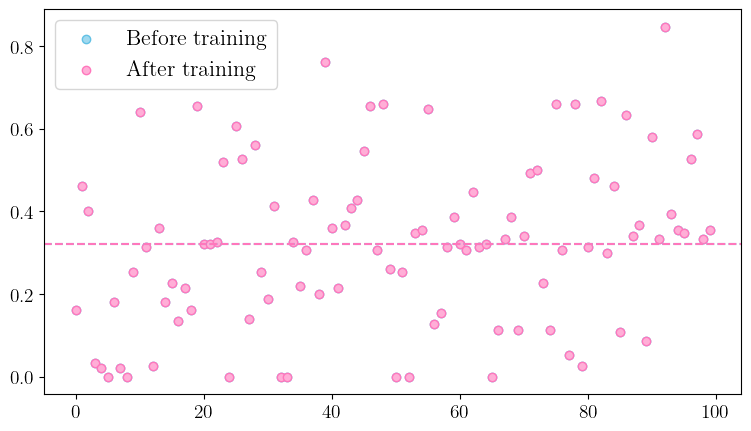

In [858]:
plt.figure(figsize = (9, 5))
plt.scatter([i for i in range(100)], accuracies[0], c = "#a0d9ef", edgecolor = "#62c1e5", label = "Before training")
plt.scatter([i for i in range(100)], accuracies[1], c = "#ffaed7", edgecolor = "#ff77bc", label = "After training")
plt.axhline(np.mean(accuracies[0]), 0, 1, linestyle = "--", color = "#62c1e5")
plt.axhline(np.mean(accuracies[1]), 0, 1, linestyle = "--", color = "#ff77bc")
plt.legend()
plt.show()

In [ ]:
#TODO something wrong with batched backpropagation

## Exercise 8: Object orientation

In [873]:
class NeuralNetwork:
    def __init__(self, network_input_size, layer_output_sizes, activation_funcs, activation_ders, cost_func, cost_der):
        # Initialize network structure and hyperparameters
        self.layers = self.create_layers(network_input_size, layer_output_sizes)
        self.activation_funcs = activation_funcs
        self.activation_ders = activation_ders
        self.cost_func = cost_func
        self.cost_der = cost_der

    def create_layers(self, network_input_size, layer_output_sizes):
        layers = []
        input_size = network_input_size
        for layer_output_size in layer_output_sizes:
            # Initialize weights and biases randomly
            W = np.random.randn(input_size, layer_output_size)
            b = np.random.randn(layer_output_size)
            layers.append((W, b))
            input_size = layer_output_size
        return layers

    def predict(self, inputs):
        # Simple feed forward pass
        a = inputs
        for (W, b), activation_func in zip(self.layers, self.activation_funcs):
            z = a @ W + b
            a = activation_func(z)
        return a

    def cost(self, inputs, targets):
        # Compute the cost function based on the predictions
        predictions = self.predict(inputs)
        return self.cost_func(predictions, targets)

    def _feed_forward_saver(self, inputs):
        # Save the activations and linear transformations (zs) for backpropagation
        layer_inputs = []
        zs = []
        a = inputs
        for (W, b), activation_func in zip(self.layers, self.activation_funcs):
            layer_inputs.append(a)
            z = a @ W + b
            a = activation_func(z)
            zs.append(z)
        return layer_inputs, zs, a

    def compute_gradient(self, inputs, targets):
        # Compute the gradients of the cost function w.r.t the weights and biases using backpropagation
        layer_inputs, zs, prediction = self._feed_forward_saver(inputs)
        layer_grads = [() for layer in self.layers]
        
        # Compute the cost derivative for the last layer
        dC_da = self.cost_der(prediction, targets)

        for i in reversed(range(len(self.layers))):
            # For the last layer, dC/dz(L) = dC/da(L) * da/dz(L)
            dC_dz = dC_da * self.activation_ders[i](zs[i])
            dC_dW = dC_dz.T @ layer_inputs[i]
            dC_db = dC_dz
            
            # Store gradients
            layer_grads[i] = (dC_dW.T, dC_db.T)
            
            # Propagate the error back to the previous layers
            if i > 0:
                W, _ = self.layers[i]
                dC_da = dC_dz @ W.T  # Backpropagate error for next layer

        return layer_grads

    def update_weights(self, layer_grads, learning_rate):
        # Update the weights and biases based on computed gradients
        for i, (dW, db) in enumerate(layer_grads):
            W, b = self.layers[i]
            self.layers[i] = (W - learning_rate * dW, b - learning_rate * db)

    #TODO these two are not necessary for the project
    def autograd_compliant_predict(self, layers, inputs):
        # This function seems to mimic autograd predictions for comparison
        a = inputs
        for (W, b), activation_func in zip(layers, self.activation_funcs):
            z = a @ W + b
            a = activation_func(z)
        return a

    def autograd_gradient(self, inputs, targets):
        # Wrapper function to check against autograd, could call an external grad() function
        predictions = self.autograd_compliant_predict(self.layers, inputs)
        return grad(self.cost_func)(predictions, targets)

In [874]:
network = NeuralNetwork(4, [8, 3], [sigmoid, softmax], [sigmoid_der, softmax_der], mse, mse_der)
layer_grads = network.compute_gradient(inputs, targets) 
print(layers_grads)

[(array([[-5.04211389e-20,  9.22951450e-18,  4.15954148e-18,
        -1.11255240e-22, -5.95272824e-18, -5.27639931e-18,
        -3.10604035e-21,  1.90499974e-23],
       [-2.41056248e-20,  6.23400738e-18,  2.83804006e-18,
        -7.99777079e-23, -3.96410943e-18, -2.53097622e-18,
        -2.18442102e-21, -1.33148229e-23],
       [-4.28371568e-20,  1.72003046e-18,  7.35698625e-19,
         1.96024278e-23, -9.94918516e-19, -3.84285081e-18,
        -6.30683624e-22,  1.14138803e-22],
       [-1.47722265e-20,  2.56176059e-19,  8.38258540e-20,
         2.39478742e-23, -1.40452550e-19, -1.21243863e-18,
        -3.05369184e-23,  5.30702899e-23]]), array([-1.01055055e-20,  1.52929087e-18,  7.04568093e-19, -2.64555876e-23,
       -9.97026926e-19, -9.32024700e-19, -6.24794849e-22,  3.00675426e-24])), (array([[-4.28069808e-18,  5.09350711e-18,  1.23647038e-18],
       [-1.31898118e-18,  4.87334670e-18,  1.26338485e-18],
       [-7.69685079e-19,  1.62992042e-20, -1.79993839e-21],
       [-4.2807361

In [ ]:
#TODO obviously something wrong still